In [1]:
import pandas as pd

In [2]:
file = open("SMSSpamCollection")

In [3]:
data = [i for i in file]

In [4]:
data[:1]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n']

In [5]:
print(len(data))

5574


In [6]:
for message_no, message in enumerate(data[:5]):
    print(message_no, message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...



1 ham	Ok lar... Joking wif u oni...



2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



3 ham	U dun say so early hor... U c already then say...



4 ham	Nah I don't think he goes to usf, he lives around here though





In [7]:
df = pd.read_csv("SMSSpamCollection", sep="\t",header=None, names=["label", "message"])

In [8]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df["message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [11]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
df["length"]= df["message"].apply(len)

In [14]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

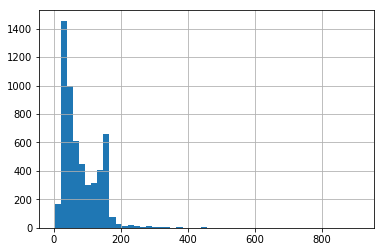

In [16]:
df["length"].hist(bins=50, label=df["label"])

In [17]:
df["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
df[df["length"]==910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019627142080>]], dtype=object)

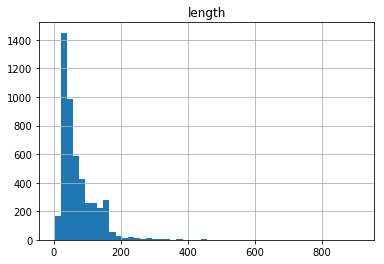

In [19]:
df[df["label"]=="ham"].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001962717AAC8>]], dtype=object)

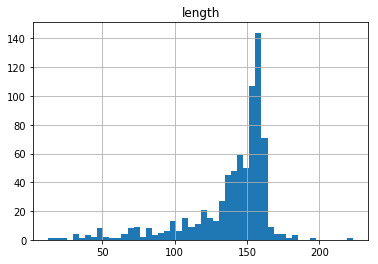

In [20]:
df[df["label"]=="spam"].hist(bins=50)

In [21]:
import string

In [22]:
mess = "This , is a Sample$$ String!! It has()()() lots of@ punctuations :* .... ;;"

In [23]:
clean_mess =[str for str in mess if str not in string.punctuation]
clean_mess

['T',
 'h',
 'i',
 's',
 ' ',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'S',
 't',
 'r',
 'i',
 'n',
 'g',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'l',
 'o',
 't',
 's',
 ' ',
 'o',
 'f',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's',
 ' ',
 ' ',
 ' ']

In [24]:
clean_mess = ''.join(clean_mess)

In [25]:
clean_mess

'This  is a Sample String It has lots of punctuations   '

In [26]:
clean_mess = clean_mess.split()
clean_mess

['This',
 'is',
 'a',
 'Sample',
 'String',
 'It',
 'has',
 'lots',
 'of',
 'punctuations']

In [27]:
from nltk.corpus import stopwords

In [28]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
clean_msg = [str for str in clean_mess if str.lower() not in stopwords.words("english")]

In [30]:
clean_msg

['Sample', 'String', 'lots', 'punctuations']

In [31]:
#summarize text cleaning in a function

def text_process(message):
    """
    1. Removes all the punctuations
    2. Removes all the stopwords
    3. Returns list of relevant words
    """
    clean_mess =[str for str in message if str not in string.punctuation]
    clean_mess = ''.join(clean_mess)
    clean_mess = clean_mess.split()
    return [str for str in clean_mess if str.lower() not in stopwords.words("english")]

In [32]:
text_process("my name is alpha...!! i have a bike@ and a car woahh... -_-")

['name', 'alpha', 'bike', 'car', 'woahh']

In [33]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
df["message"].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv = CountVectorizer(analyzer=text_process)
cv.fit(df["message"])

CountVectorizer(analyzer=<function text_process at 0x00000196285BFD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [37]:
#Length of unique words in the document
len(cv.vocabulary_)

11425

In [38]:
msg7 = df['message'][6]
msg7

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [39]:
#bag_of_word for a specific string
bow_msg7=cv.transform([msg7])

In [40]:
bow_msg7.indices

array([ 1802,  4590,  5193,  7800,  8761,  9971, 10629], dtype=int32)

In [41]:
bow_msg7.get_shape()

(1, 11425)

In [42]:
print(bow_msg7)

  (0, 1802)	1
  (0, 4590)	1
  (0, 5193)	1
  (0, 7800)	2
  (0, 8761)	1
  (0, 9971)	1
  (0, 10629)	1


In [43]:
cv.get_feature_names()[7800]

'like'

In [44]:
bow_message = cv.transform(df['message'])

In [45]:
print("shape :",bow_message.get_shape())
print("non zero occurences :",bow_message.getnnz())

shape : (5572, 11425)
non zero occurences : 50548


In [46]:
print("Sparsity :",(100*bow_message.nnz) / (bow_message.shape[0]* bow_message.shape[1]))

Sparsity : 0.07940295412668218


In [47]:
# TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(bow_message)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [50]:
# calculate tfidf for a specific bag_of_word
tfidf_msg7 = tfidf_transformer.transform(bow_msg7)
print(tfidf_msg7)

  (0, 10629)	0.335276669693
  (0, 9971)	0.326869178006
  (0, 8761)	0.437009933219
  (0, 7800)	0.41453906826
  (0, 5193)	0.338434110884
  (0, 4590)	0.437009933219
  (0, 1802)	0.335276669693


In [51]:
cv.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [52]:
print(tfidf_transformer.idf_[cv.vocabulary_["love"]])
print(tfidf_transformer.idf_[cv.vocabulary_["paid"]])

4.77365852365
7.67977863851


In [53]:
tfidf_message = tfidf_transformer.transform(bow_message)
print(tfidf_message.shape)

(5572, 11425)


In [54]:
# Use classification now

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
msg_train, msg_test, label_train, label_test = train_test_split(tfidf_message,df['label'],test_size=0.2)

In [59]:
print(msg_train.shape)
print(label_train.shape)
print(msg_test.shape)
print(label_test.shape)

(4457, 11425)
(4457,)
(1115, 11425)
(1115,)


In [60]:
model = MultinomialNB().fit(msg_train,label_train)

In [61]:
label_pred = model.predict(msg_test)

In [62]:
print(classification_report(label_test,label_pred))
print(confusion_matrix(label_test,label_pred))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98       966
       spam       1.00      0.67      0.80       149

avg / total       0.96      0.96      0.95      1115

[[966   0]
 [ 49 100]]


In [63]:
# For single Case
bow = cv.transform(["I need to talk to you. call me urgent"])
print(bow)

  (0, 5275)	1
  (0, 8386)	1
  (0, 10303)	1
  (0, 10779)	1


In [64]:
#tfidf
tfidf = tfidf_transformer.transform(bow)
print(tfidf)

  (0, 10779)	0.668032504047
  (0, 10303)	0.525556806695
  (0, 8386)	0.41154934086
  (0, 5275)	0.328861302849


In [65]:
model.predict(tfidf)[0]

'ham'

In [66]:
# probabilty for ham or spam
model.predict_proba(tfidf)

array([[ 0.95778066,  0.04221934]])